# Project: Investigating No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset chosen for analysis covers various aspects regarding medical appointments in Brazil. The type of data collected is date of appointment, type of condition a patient may have, the neighbourhood of the clinic site, and several others data points. The focus of the analysis will be centered on the number of No-show appointments. Using that as the dependent variable three independent variables will be analyzed - WeekDay, Condition, and Neighbourhood.

The questions I will be looking to gain insight on:
1. Does the day of the week play a role in the number of no-show appointments?
2. Does the condition for which the patient is coming in have an affect on the number of no-show appointments?
3. Is there a neighbourhood that stands out from the rest as having a higher proportion of no-show appointments?


In [1]:
import numpy as np
import pandas as pd
import nbconvert as nb
import matplotlib.pyplot as plt
%matplotlib inline
%pdb

Automatic pdb calling has been turned ON


<a id='wrangling'></a>
## Data Wrangling


### General Properties

First, I will read in the csv. Then take a look at the column names along with their dtypes.

In [2]:
no_show_appts = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
no_show_appts.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The next two cells are used to add a 'WeekDayAppt' column so the data can be analyzed based on day of the week. Then I take a look at the first few lines to make sure the day of the week is correct.

In [4]:
no_show_appts['DatetimeApptDay'] = pd.to_datetime(no_show_appts['AppointmentDay'])

In [5]:
no_show_appts['WeekDayAppt'] = no_show_appts['DatetimeApptDay'].dt.day_name()

In [6]:
no_show_appts.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DatetimeApptDay,WeekDayAppt
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 00:00:00+00:00,Friday
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 00:00:00+00:00,Friday
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 00:00:00+00:00,Friday
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 00:00:00+00:00,Friday
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 00:00:00+00:00,Friday


## Data Cleaning

The following two cells show that there are no repeated appointment ids. This tells me that the appointment id is the unique key, there are no duplicates, and that column is clean.

In [7]:
len(no_show_appts['AppointmentID'])

110527

In [8]:
len(no_show_appts['AppointmentID'].unique())

110527

Next I used '.describe()' to see if anything looked out of place.

In [9]:
no_show_appts.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the chart above, we see a few things that need to be cleaned up:
1. 'Age' of less than 0 and greater than 100. To clean the data up, I removed any 'Age' < 1 and > 100. 
2. max 'Handcap' = 4. I would expect the max to be 1 just like the rest of the conditions. To clean this, I set any number > 1 to 1.
3. Hipertension to Hypertension
4. Handcap to Handicap

In [10]:
no_show_appts.drop(no_show_appts[no_show_appts['Age'] < 1].index, inplace=True)

In [11]:
no_show_appts.drop(no_show_appts[no_show_appts['Age'] > 100].index, inplace=True)

In [12]:
no_show_appts.loc[no_show_appts['Handcap'] > 1, 'Handcap'] = 1

In [13]:
no_show_appts.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)

I ran the below to confirm the changes above.

In [14]:
no_show_appts.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.069800e+05,1.069800e+05,106980.000000,106980.000000,106980.000000,106980.000000,106980.000000,106980.000000,106980.000000
mean,1.472737e+14,5.675433e+06,38.311311,0.101038,0.203776,0.074248,0.031408,0.020901,0.323275
std,2.558145e+14,7.133332e+04,22.459144,0.301380,0.402807,0.262175,0.174418,0.143054,0.467729
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173120e+12,5.640489e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.171698e+13,5.680742e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433573e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The only anamoly that jumps out to me is Saturday. However, that is the only Saturday in the data so I would expect lower numbers.

In [15]:
no_show_appts.groupby('WeekDayAppt').agg(['count', 'size', 'nunique']).stack()

PatientId  AppointmentID  Gender  ScheduledDay  \
WeekDayAppt                                                           
Friday      count        18464          18464   18464         18464   
            size         18464          18464   18464         18464   
            nunique      14678          18464       2         17686   
Monday      count        21901          21901   21901         21901   
            size         21901          21901   21901         21901   
            nunique      17349          21901       2         21146   
Saturday    count           39             39      39            39   
            size            39             39      39            39   
            nunique         38             39       2            39   
Thursday    count        16656          16656   16656         16656   
            size         16656          16656   16656         16656   
            nunique      13770          16656       2         16099   
Tuesday     count        24830          24830   24830         24830   
            size         24830          24830   24830         24830   
            nunique      19501          24830       2         23886   
Wednesday   count        25090          25090   25090         25090   
            size         25090          25090   25090         25090   
            nunique      19441          25090       2         24083   

                     AppointmentDay    Age  Neighbourhood  Scholarship  \
WeekDayAppt                                                              
Friday      count             18464  18464          18464        18464   
            size              18464  18464          18464        18464   
            nunique               5     99             80            2   
Monday      count             21901  21901          21901        21901   
            size              21901  21901          21901        21901   
            nunique               5     98             79            2   
Saturday    count                39     39             39           39   
            size                 39     39             39           39   
            nunique               1     29              4            2   
Thursday    count             16656  16656          16656        16656   
            size              16656  16656          16656        16656   
            nunique               4     98             79            2   
Tuesday     count             24830  24830          24830        24830   
            size              24830  24830          24830        24830   
            nunique               6     98             79            2   
Wednesday   count             25090  25090          25090        25090   
            size              25090  25090          25090        25090   
            nunique               6     99             78            2   

                     Hypertension  Diabetes  Alcoholism  Handicap  \
WeekDayAppt                                                         
Friday      count           18464     18464       18464     18464   
            size            18464     18464       18464     18464   
            nunique             2         2           2         2   
Monday      count           21901     21901       21901     21901   
            size            21901     21901       21901     21901   
            nunique             2         2           2         2   
Saturday    count              39        39          39        39   
            size               39        39          39        39   
            nunique             2         2           2         2   
Thursday    count           16656     16656       16656     16656   
            size            16656     16656       16656     16656   
            nunique             2         2           2         2   
Tuesday     count           24830     24830       24830     24830   
            size            24830     24830       24830     24830   
            nun

I ran the below to see when the data was collected.

In [16]:
no_show_appts['AppointmentDay'].value_counts()

2016-06-06T00:00:00Z    4528
2016-05-16T00:00:00Z    4448
2016-05-30T00:00:00Z    4359
2016-06-08T00:00:00Z    4356
2016-05-09T00:00:00Z    4352
2016-06-01T00:00:00Z    4351
2016-05-11T00:00:00Z    4347
2016-06-07T00:00:00Z    4264
2016-05-12T00:00:00Z    4233
2016-05-17T00:00:00Z    4227
2016-05-18T00:00:00Z    4220
2016-05-02T00:00:00Z    4214
2016-06-02T00:00:00Z    4203
2016-05-10T00:00:00Z    4177
2016-05-31T00:00:00Z    4158
2016-05-03T00:00:00Z    4128
2016-05-05T00:00:00Z    4113
2016-05-19T00:00:00Z    4107
2016-05-04T00:00:00Z    4048
2016-06-03T00:00:00Z    3977
2016-05-13T00:00:00Z    3885
2016-05-24T00:00:00Z    3876
2016-05-06T00:00:00Z    3791
2016-05-25T00:00:00Z    3768
2016-05-20T00:00:00Z    3707
2016-04-29T00:00:00Z    3104
2016-05-14T00:00:00Z      39
Name: AppointmentDay, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Functions for Exploratory Data Analysis

In [17]:
def no_show_yes(column_name, head_val):
    return(no_show_appts[no_show_appts['No-show']=='Yes'].groupby([column_name]).size().sort_values(ascending=False).head(head_val))

In [18]:
def no_show_all(column_name, head_val):
    return(no_show_appts.groupby([column_name]).size().sort_values(ascending=False).head(head_val))

### No-shows by Weekday

While there are days that have more no shows, the data tends to trend with the number of appointments that day. More appointments in general means more no shows. However, the ratio between total appointments and number of no shows appears to be consistent. Thursdays are the low point which would be expected as only four Thursdays are part of the data collected. Wednesday and Tuesday each had six days of data collected so seeing higher numbers on those days correlates.

(WeekDayAppt
Tuesday      5024
Wednesday    4948
Monday       4514
Friday       3940
Thursday     3242
Saturday        9
dtype: int64, WeekDayAppt
Wednesday    25090
Tuesday      24830
Monday       21901
Friday       18464
Thursday     16656
Saturday        39
dtype: int64)


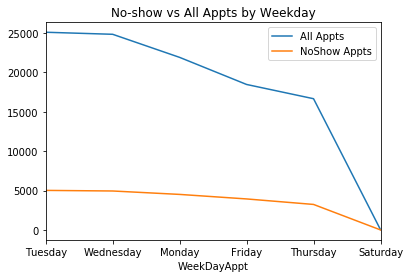

In [19]:
WeekDay_NoShow_Yes = no_show_yes('WeekDayAppt', 6)
WeekDay_All_Appts = no_show_all('WeekDayAppt', 6)
print(WeekDay_NoShow_Yes, WeekDay_All_Appts)
WeekDay_All_Appts.plot(kind='line', title='No-show vs All Appts by Weekday')
WeekDay_NoShow_Yes.plot(kind='line')
plt.legend(['All Appts', 'NoShow Appts'])

### No-shows by Neighbourhood

I decided to limit the number of neighbourhoods to 10 in the first plot. Those 10 neighbourhoods represent roughly 40% of all the appointments. The data really did not show anything significant. As with the day of the week, the higher the number of total appointments meant a higher number of no shows. The ratios stayed pretty consistent again as witnessed in the line chart.

(Neighbourhood
JARDIM CAMBURI       1432
MARIA ORTIZ          1194
ITARARÉ               898
RESISTÊNCIA           875
CENTRO                692
JESUS DE NAZARETH     676
JARDIM DA PENHA       627
CARATOÍRA             586
TABUAZEIRO            552
BONFIM                537
dtype: int64, Neighbourhood
JARDIM CAMBURI       7586
MARIA ORTIZ          5562
RESISTÊNCIA          4235
JARDIM DA PENHA      3851
ITARARÉ              3412
CENTRO               3282
SANTA MARTHA         3041
TABUAZEIRO           3019
JESUS DE NAZARETH    2719
BONFIM               2700
dtype: int64)


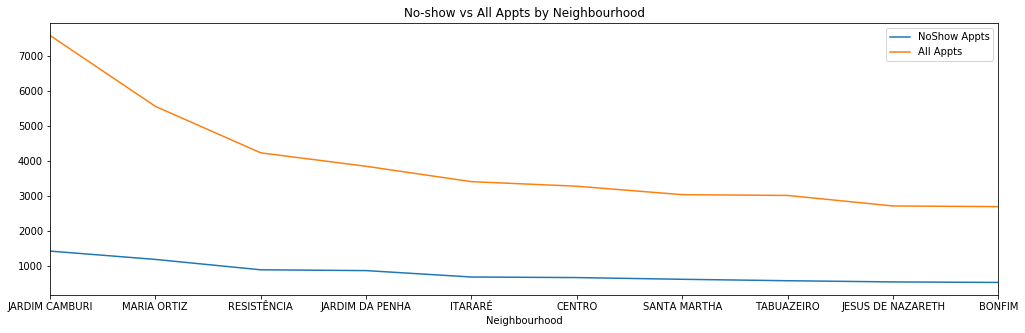

In [20]:
Neighbourhood_NoShow_Yes = no_show_yes('Neighbourhood', 10)
Neighbourhood_All_Appts = no_show_all('Neighbourhood', 10)
print(Neighbourhood_NoShow_Yes, Neighbourhood_All_Appts)
Neighbourhood_NoShow_Yes.plot(figsize=(17,5), kind='line', title='No-show vs All Appts by Neighbourhood')
Neighbourhood_All_Appts.plot(figsize=(17,5), kind='line')
plt.legend(['NoShow Appts', 'All Appts'])

The data below takes a look at the spread of appointments across the 81 neighbourhoods. There are three outliers with a majority of the neighbourhoods having less than 2,000 appointments. This distribution correlates with the data regarding the top 10 neighborhoods above where almost 40% of the appointments are contained in 10 neighbourhoods.

Text(0.5,1,'Grouped by Neighbourhood')

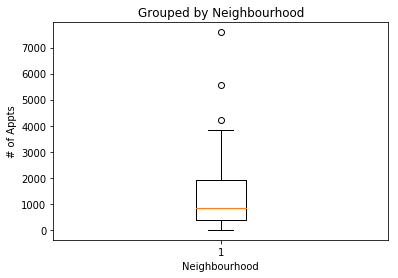

In [21]:
All_Neighbourhood_Appts = no_show_all('Neighbourhood', 81)
plt.boxplot(All_Neighbourhood_Appts)
plt.xlabel('Neighbourhood')
plt.ylabel('# of Appts')
plt.title('Grouped by Neighbourhood')

### No-show based on Condition

This section explores whether a specific condition impacts the number of no-shows. Honestly, I expected Alcoholism to show a higher number of no-shows. However, the ratios again are very close for each condition when compared to the total number of appointments by condition.

         Hypertension  Diabetes  Alcoholism
No-show                                    
Yes              3772      1430         677


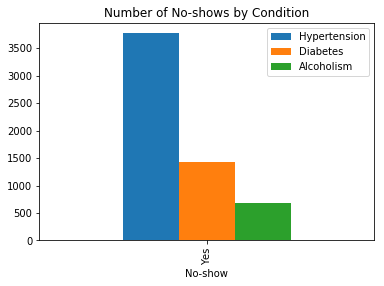

In [22]:
Condition_NoShow_Yes = no_show_appts[no_show_appts['No-show']=='Yes'].groupby(['No-show'])\
                        [['Hypertension', 'Diabetes', 'Alcoholism']].sum()
print(Condition_NoShow_Yes)
Condition_NoShow_Yes.plot.bar(title='Number of No-shows by Condition')

Hypertension    21800
Diabetes         7943
Alcoholism       3360
dtype: int64


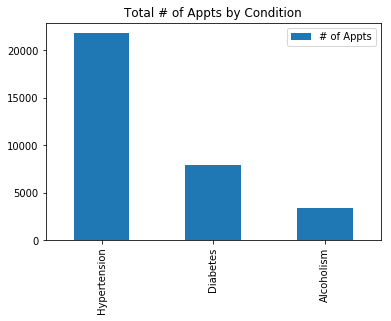

In [23]:
Condition_NoShow_All = no_show_appts.iloc[:,8:11].sum(axis=0)
print(Condition_NoShow_All)
Condition_NoShow_All.plot.bar(title='Total # of Appts by Condition')
plt.legend(['# of Appts'])

### Appointments by Age Group

This section takes a look at the number of appointments by age group. Each bar covers five years. I was curious to see the distribution across age groups. A couple interesting things: 
1. The steady decline from ages 0-5 to 10-15. 
2. There is a rather sharp decline in appointments starting at age 60.

The above two points would be interesting to investigate further, but the provided data does not allow for this.

Text(0.5,1,'Appointments by Age Group')

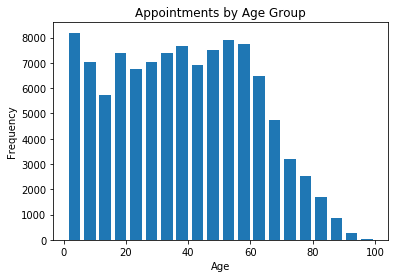

In [24]:
plt.hist(no_show_appts['Age'], bins=20, rwidth=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Appointments by Age Group')

<a id='conclusions'></a>
## Conclusions

To summarize the findings I do not see much the clinics can do to limit the number of no shows. I did not observe outliers that specifically pointed to reasons for the no-shows. The data did not include any information about if reminders are sent. It would be interesting to see if the number of no shows decreases if a person is contacted one or two days prior to their appointment. 

<b>Limitations</b>
<ul>
<li>The amount of data - 27 days. If they are open Monday through Friday with a Saturday every once in awhile, they are open roughly 260 days each year.</li> 
<li>The time of year - May. The weather tends to be pretty nice and dry during the time of the data provided. It would be interesting to see how the weather affects the No-show numbers.</li>
</ul>


I look forward to your feedback and will do my best should anything need to be corrected or clarified.

Thank you!